In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
import os
import subprocess
subprocess.check_output("pwd", shell=True)

b'/c/Users/bilge/Desktop/Recit7\n'

In [4]:
deco = pd.read_csv('yeniEco.csv')

In [5]:
deco = deco.drop(['Time Code', 'Series Code', 'Series Name'], axis=1)

In [6]:
df = pd.read_csv('dataset.csv', low_memory=False)

In [7]:
deco = deco[deco.Time >= 1980.0]
deco = deco[deco.Time <=2014]

In [8]:
deco['United States [USA]'] = deco['United States [USA]'].astype(np.float64)

In [9]:
deco

,Time,United States [USA]
20,1980.0,-0.244596
21,1981.0,2.594470
22,1982.0,-1.910891
23,1983.0,4.632457
24,1984.0,7.259087
25,1985.0,4.238738
26,1986.0,3.511614
27,1987.0,3.461748
28,1988.0,4.203972
29,1989.0,3.680524


In [10]:
df = df.drop(['Agency Code', 'Agency Name', 'Agency Type', 'Victim Ethnicity', 'Perpetrator Race', 'Perpetrator Sex', 'Victim Sex', 'Victim Race', 'Perpetrator Ethnicity', 'Relationship', 'Victim Count', 'Perpetrator Count', 'Crime Type', 'City', 'State', 'Crime Solved', 'Record Source', 'Weapon', 'Month', 'Record ID'], axis=1)

In [11]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
df.columns = cols

In [12]:
cols

Index(['Year', 'Incident', 'Victim_Age', 'Perpetrator_Age'], dtype='object')

In [13]:
df = df[df.Perpetrator_Age != "0"]

In [14]:
df

,Year,Incident,Victim_Age,Perpetrator_Age
0,1980,1,14,15
1,1980,1,43,42
3,1980,1,43,42
5,1980,1,30,36
6,1980,2,42,27
7,1980,1,99,35
9,1980,3,38,40
11,1980,2,20,49
12,1980,3,36,39
13,1980,1,20,49


In [16]:
deco.columns = ['Year', 'GDP']
merged = pd.merge(df, deco, on='Year')
merged.head

<bound method NDFrame.head of       Year  Incident  Victim_Age Perpetrator_Age       GDP
0     1985         1          38              28  4.238738
1     1985         2          24              24  4.238738
2     1985         6          23              39  4.238738
3     1985         9          20              41  4.238738
4     1985         2          35              36  4.238738
5     1985        99          32              38  4.238738
6     1985         1          29              25  4.238738
7     1985         2          28              21  4.238738
8     1985         1          27              21  4.238738
9     1985         3          37              26  4.238738
10    1985         3          54              47  4.238738
11    1985         1          59              25  4.238738
12    1985         1          33              19  4.238738
13    1985         1          31              31  4.238738
14    1985        16          31              39  4.238738
15    1985         1      

In [76]:
df.describe()

,Record_ID,Year,Incident,Victim_Age
count,422127.000000,422127.000000,422127.000000,422127.000000
mean,313098.097212,1995.476188,20.561568,33.980958
std,186569.200470,10.033248,90.546288,32.343707
min,1.000000,1980.000000,0.000000,0.000000
25%,148498.500000,1987.000000,1.000000,22.000000
50%,310119.000000,1994.000000,2.000000,30.000000
75%,475775.500000,2004.000000,7.000000,42.000000
max,638454.000000,2014.000000,999.000000,998.000000


In [77]:
deco.describe()

,Time,United States [USA]
count,35.000000,35.000000
mean,1997.000000,2.643494
std,10.246951,1.978295
min,1980.000000,-2.775530
25%,1988.500000,1.782349
50%,1997.000000,2.745857
75%,2005.500000,3.916762
max,2014.000000,7.259087


In [15]:
df = df.sample(n=2000)

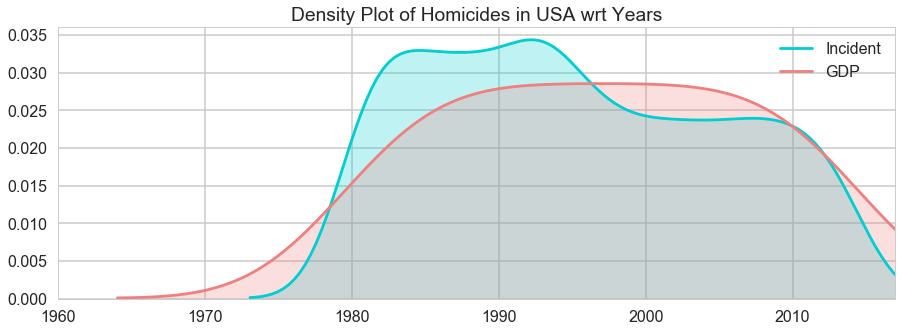

In [229]:
plt.figure(figsize=(15,5))
sns.kdeplot(df["Year"], color="darkturquoise", shade=True)
sns.kdeplot(deco["Time"], color="lightcoral", shade=True)
plt.legend(['Incident', 'GDP'])
plt.title('Density Plot of Homicides in USA wrt Years')
plt.xlim(1960,2017)

plt.show()

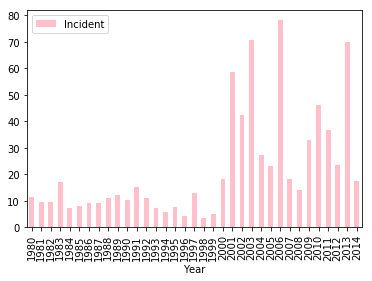

In [81]:
compare_attr = 'Year'
df_pclass = df[[compare_attr, 'Incident']].groupby(compare_attr).mean()
df_pclass.plot.bar(color="pink")

In [82]:
compare_attr = 'Time'
deco_pclass = deco[[compare_attr, 'United States [USA]']].groupby(compare_attr).mean()
deco_pclass.plot.bar(color="blue")

KeyError: "['Time' 'United States [USA]'] not in index"

In [17]:
freq = pd.crosstab(index=[merged['Incident']], columns=merged['GDP'])
freq

GDP,-2.77552957416808,-1.91089106804856,-0.291621458693953,-0.244596225208085,-0.0740845307123976,0.975981833932124,1.60145467247139,1.67733152992453,1.77857023965289,1.78612768745552,...,3.79588122942587,4.03764342486481,4.09217644881066,4.20397197941298,4.23873752083914,4.44991096328404,4.48702649316731,4.63245718120484,4.68519960839866,7.25908695936059
Incident,,,,,,,,,,,,,,,,,,,,,
1,26,28,21,38,33,25,30,19,32,25,...,32,29,28,27,27,18,22,34,29,28
2,3,10,5,10,6,3,4,2,5,4,...,5,9,8,7,7,5,9,5,2,9
3,0,3,0,3,8,0,2,1,3,2,...,3,3,2,5,6,2,2,5,1,5
4,2,3,0,5,2,0,4,4,4,1,...,4,0,0,4,1,2,2,2,1,1
5,1,0,3,2,3,2,0,0,0,2,...,2,2,1,1,1,4,2,5,0,1
6,1,2,0,2,0,1,0,2,3,0,...,1,2,0,0,3,2,2,2,1,2
7,0,0,0,3,2,3,1,0,1,1,...,1,1,1,0,0,1,1,1,1,1
8,0,3,0,2,1,0,1,1,0,1,...,2,1,0,2,3,0,1,0,0,0
9,1,2,1,1,0,0,0,0,0,0,...,0,0,1,0,1,1,2,0,0,2


In [18]:
import scipy.stats as stats
chi_stats = stats.chi2_contingency(freq)
chi_stats

(5082.731989913391,
 0.3047964670742917,
 5032,
 array([[2.0787e+01, 2.8899e+01, 2.0787e+01, ..., 3.3462e+01, 2.1294e+01,
         2.9406e+01],
        [4.4280e+00, 6.1560e+00, 4.4280e+00, ..., 7.1280e+00, 4.5360e+00,
         6.2640e+00],
        [2.0090e+00, 2.7930e+00, 2.0090e+00, ..., 3.2340e+00, 2.0580e+00,
         2.8420e+00],
        ...,
        [2.0500e-02, 2.8500e-02, 2.0500e-02, ..., 3.3000e-02, 2.1000e-02,
         2.9000e-02],
        [2.0500e-02, 2.8500e-02, 2.0500e-02, ..., 3.3000e-02, 2.1000e-02,
         2.9000e-02],
        [2.0500e-02, 2.8500e-02, 2.0500e-02, ..., 3.3000e-02, 2.1000e-02,
         2.9000e-02]]))

In [19]:
alpha = 0.05
critical_value = crit = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
                      df = chi_stats[2]) #degree of freedom
critical_value

5198.140057505551

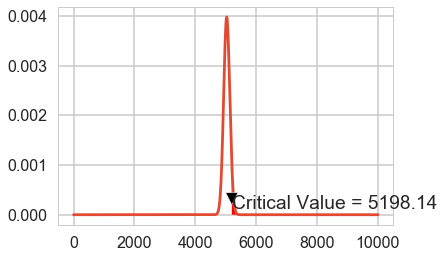

In [43]:
x = np.linspace(0, 10000, 50000)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.0002), xytext=(critical_value, 0.0004), 
            arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

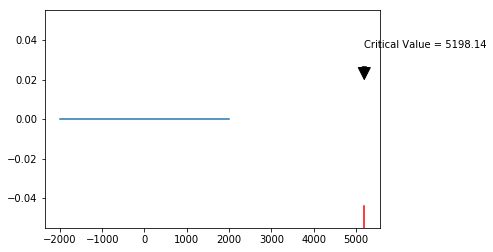

In [21]:
x = np.linspace(-2000, 2000, 1000)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value, ymin=0,ymax=0.1, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.02), xytext=(critical_value, 0.04),
arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

NameError: name 'tvalue' is not defined

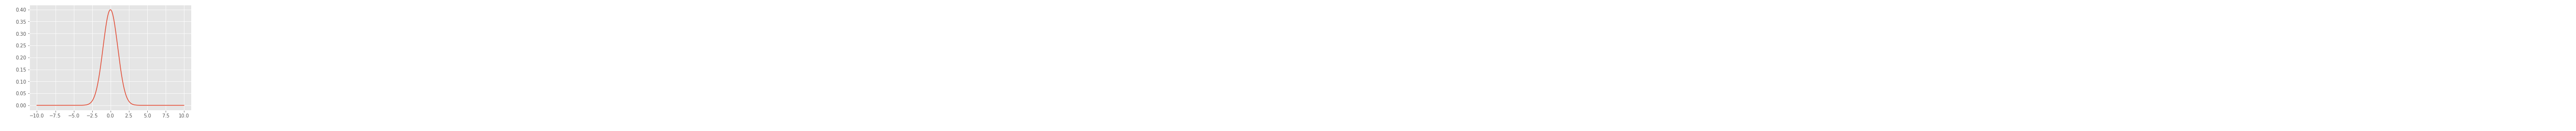

In [22]:

plt.style.use('ggplot')
x = np.linspace(-10, 10, 1000)
plt.plot(x, stats.t.pdf(x,chi_stats[2]))
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.10), xytext=(critical_value, 0.12),
 arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='bottom' )
plt.annotate('Current Value = {0:.2f}'.format(tvalue), xy=(tvalue, 0.02), xytext=(tvalue, 0.01))
plt.fill_between(x, stats.t.pdf(x,chi_stats[2]), where= x > critical_value, facecolor='grey', interpolate=True)
plt.show()

,Incident,Victim_Age,GDP
Incident,1.000000,0.028808,-0.076702
Victim_Age,0.028808,1.000000,-0.032583
GDP,-0.076702,-0.032583,1.000000


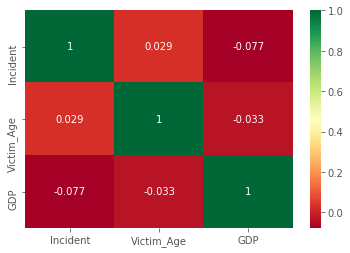

In [23]:
corr = merged.corr()
sns.heatmap(corr, annot=True, cbar=True, cmap="RdYlGn")
corr

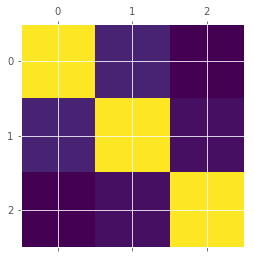

In [25]:
plt.matshow(merged.corr())

In [93]:
freq2 = pd.crosstab(index=[deco['United States [USA]']], columns=deco['Time'])
freq2

KeyError: 'United States [USA]'

In [94]:
import scipy.stats as stats
chi_stat = stats.chi2_contingency(freq2)
chi_stat

NameError: name 'freq2' is not defined

In [95]:
alpha = 0.05
critical_value2 = crit2 = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
                      df = chi_stat[2]) #degree of freedom
critical_value2

NameError: name 'chi_stat' is not defined

NameError: name 'critical_value2' is not defined

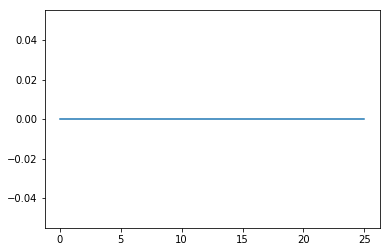

In [96]:
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value2, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value2), xy=(critical_value2, 0.02), xytext=(critical_value2, 0.04), 
            arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value2, facecolor='red', interpolate=True)

,Time,United States [USA]
Time,1.000000,-0.216018
United States [USA],-0.216018,1.000000


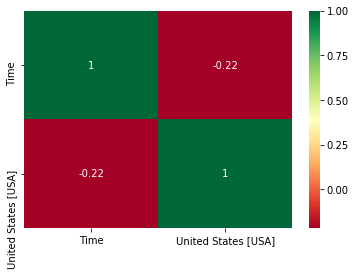

In [28]:
corr2 = deco.corr()
sns.heatmap(corr2, annot=True, cbar=True, cmap="RdYlGn")
corr2

In [26]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")



D:\bilge\Programs\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
print(merged.shape)

(2000, 5)


In [28]:
print(merged.columns)

Index(['Year', 'Incident', 'Victim_Age', 'Perpetrator_Age', 'GDP'], dtype='object')


In [29]:
bos = pd.DataFrame(merged)

print(bos.head())

   Year  Incident  Victim_Age Perpetrator_Age       GDP
0  1985         1          38              28  4.238738
1  1985         2          24              24  4.238738
2  1985         6          23              39  4.238738
3  1985         9          20              41  4.238738
4  1985         2          35              36  4.238738


In [30]:
print(merged.shape)

(2000, 5)


In [31]:
#bos['GDP'] = merged

print(bos.head())

   Year  Incident  Victim_Age Perpetrator_Age       GDP
0  1985         1          38              28  4.238738
1  1985         2          24              24  4.238738
2  1985         6          23              39  4.238738
3  1985         9          20              41  4.238738
4  1985         2          35              36  4.238738


In [32]:

print(bos.describe())

          Incident   Victim_Age          GDP
count  2000.000000  2000.000000  2000.000000
mean     22.131500    33.203000     2.684237
std      94.311397    17.680189     1.894732
min       1.000000     0.000000    -2.775530
25%       1.000000    21.000000     1.786128
50%       1.000000    30.000000     2.745857
75%       7.000000    42.000000     4.037643
max     989.000000    99.000000     7.259087


In [33]:
X = bos.drop('GDP', axis = 1)
Y = bos['GDP']

In [34]:
import sklearn.cross_validation

D:\bilge\Programs\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1340, 4)
(660, 4)
(1340,)
(660,)


Text(0.5,1,'GDP vs Predicted GDP: $Y_i$ vs $\\hat{Y}_i$')

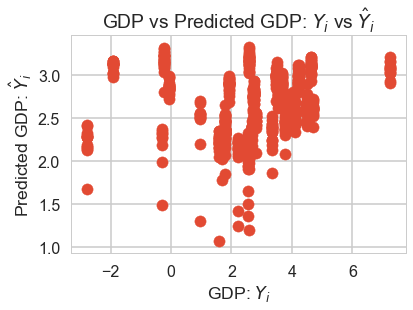

In [36]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("GDP: $Y_i$")
plt.ylabel("Predicted GDP: $\hat{Y}_i$")
plt.title("GDP vs Predicted GDP: $Y_i$ vs $\hat{Y}_i$")

In [37]:

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)

print(mse)

3.210154145903993
